# Analysis of PA School State Funding

## Configure environment and import data

In [23]:
import pandas as pd
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [29]:
data = {}
os.chdir('/Users/dwynne891/personal/school_funding/')

keep_vars = [
    'LEA',
    'AUN',
    'Grads',
    'Cohort',
    'Cohort Grad Rate'
]

for i in range(11,18):
    
    file_name = '20{}-20{} Pennsylvania 4-Year Cohort Grad Rates.xlsx'.format(i,i+1)
    
    grad_data = pd.read_excel(
        file_name,
        sheet_name = 'Grad Rate by LEA',
        header = 2,
    ).rename({
        'Total Grads':'Grads',
        'Total Cohort':'Cohort',
        'Total Grad Rate':'Cohort Grad Rate'},
        axis = 1
    )
    
    grad_data = grad_data.loc[grad_data.LEA.str.find(' SD') > -1, keep_vars]
    
    file_name = 'Finances BEF 20{}-{}.xlsx'.format(i,i+1)
    
    fund_data = pd.read_excel(
        file_name,
        sheet_name = 1,
        header = 0
    )
    
    fund_data = fund_data.iloc[:,[0,3]]
    fund_data.columns = ['AUN','BEF']
    
    data['20{}-20{}'.format(i,i+1)] = pd.merge(
        grad_data,
        fund_data,
        on = 'AUN',
        how = 'left'
    )
    
    data['20{}-20{}'.format(i,i+1)]['School Year'] = '20{}-20{}'.format(i,i+1)

In [33]:
complete = pd.concat(
    [data[i] for i in data.keys()],
    axis = 0
).dropna()
complete['Funding per Student'] = complete['BEF']/complete['Cohort']
complete.head()

/Users/dwynne891/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,AUN,BEF,Cohort,Cohort Grad Rate,Grads,LEA,School Year,Funding per Student
0,101260303.0,22118943.69,299.0,0.8194,245.0,Albert Gallatin Area SD,2011-2012,73976.400301
1,101260803.0,11618272.78,125.0,0.7840,98.0,Brownsville Area SD,2011-2012,92946.182240
2,101261302.0,28755346.27,345.0,0.7507,259.0,Connellsville Area SD,2011-2012,83348.829768
3,101262903.0,6581003.60,87.0,0.8621,75.0,Frazier SD,2011-2012,75643.719540
4,101264003.0,13092545.52,269.0,0.8513,229.0,Laurel Highlands SD,2011-2012,48671.172937


## Analyze data

In [34]:
complete.sort_values('Funding per Student', ascending = False).head()

,AUN,BEF,Cohort,Cohort Grad Rate,Grads,LEA,School Year,Funding per Student
238,112679002.0,56234719.31,156.0,0.814103,127.0,York City SD,2013-2014,360478.969936
492,112679002.0,62625077.79,227.0,0.625551,142.0,York City SD,2016-2017,275881.399956
238,112679002.0,56234719.31,236.0,0.728800,172.0,York City SD,2014-2015,238282.708941
494,112679002.0,58969640.27,281.0,0.590747,166.0,York City SD,2015-2016,209856.371068
379,104435603.0,14724069.90,73.0,0.931507,68.0,Sharon City SD,2016-2017,201699.587671


In [35]:
complete.loc[complete.LEA=='Philadelphia City SD']

,AUN,BEF,Cohort,Cohort Grad Rate,Grads,LEA,School Year,Funding per Student
460,126515001.0,9.682569e+08,13524.0,0.615100,8318.0,Philadelphia City SD,2011-2012,71595.454052
460,126515001.0,9.841299e+08,11226.0,0.681454,7650.0,Philadelphia City SD,2013-2014,87665.235569
460,126515001.0,9.841299e+08,10846.0,0.648100,7029.0,Philadelphia City SD,2014-2015,90736.671077
332,126515001.0,1.020075e+09,10108.0,0.685793,6932.0,Philadelphia City SD,2015-2016,100917.587025
331,126515001.0,1.067174e+09,10409.0,0.671919,6994.0,Philadelphia City SD,2016-2017,102524.183557
331,126515001.0,1.097360e+09,10427.0,0.628273,6551.0,Philadelphia City SD,2017-2018,105242.141297


## Train simple linear regression model

In [79]:
y = complete['Cohort Grad Rate']
X = complete['Funding per Student']
X_alt = X * 1.1
#X = sm.add_constant(X)

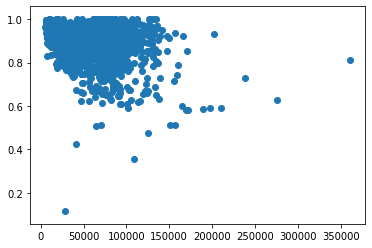

In [67]:
#plt.scatter(X['Funding per Student'], y)
plt.scatter(X, y)

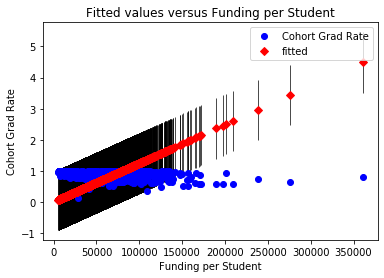

In [70]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(OLS, 0, ax=ax)

### Alternative scenario OLS

In [87]:
print("Model predicted statewide graduation rate: \n{0:.1f}%".format(OLS.predict(X).mean()*100))
print("Actual statewide graduation rate: \n{0:.1f}%".format(y.mean()*100))
print("Model predicted statewide graduation rate with 110% of funding: \n{0:.1f}%".format(OLS.predict(X_alt).mean()*100))

Model predicted statewide graduation rate: 
65.0%
Actual statewide graduation rate: 
90.4%
Model predicted statewide graduation rate with 110% of funding: 
71.5%


## Logit regression

In [68]:
OLS = sm.OLS(y, X).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Cohort Grad Rate   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              7064.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                        0.00
Time:                        22:18:18   Log-Likelihood:                         -2118.2
No. Observations:                2974   AIC:                                      4238.
Df Residuals:                    2973   BIC:                                      4244.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Funding per Student  1.244e-05   1.48e-07     84.049      0.000    1.22e-05    1.27e-05
==============================================================================
Omnibus:                      732.904   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2960.741
Skew:                          -1.154   Prob(JB):                         0.00
Kurtosis:                       7.309   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
logit = sm.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.260811
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Cohort Grad Rate   No. Observations:                 2974
Model:                          Logit   Df Residuals:                     2973
Method:                           MLE   Df Model:                            0
Date:                Mon, 09 Dec 2019   Pseudo R-squ.:                  -36.81
Time:                        22:18:27   Log-Likelihood:                -775.65
converged:                       True   LL-Null:                       -20.517
Covariance Type:            nonrobust   LLR p-value:                       nan
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Funding per Student  3.582e-05   1.22e-06     29.354      0.000    3.34e-05    3.82e-05
=======================================================================================
"""

### Alternative scenario logit

In [88]:
print("Model predicted statewide graduation rate: \n{0:.1f}%".format(logit.predict(X).mean()*100))
print("Actual statewide graduation rate: \n{0:.1f}%".format(y.mean()*100))
print("Model predicted statewide graduation rate with 110% of funding: \n{0:.1f}%".format(logit.predict(X_alt).mean()*100))

Model predicted statewide graduation rate: 
82.2%
Actual statewide graduation rate: 
90.4%
Model predicted statewide graduation rate with 110% of funding: 
83.8%
